In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#df.drop(['Churn'], axis=1, inplace=True)
#df.head()

In [6]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [7]:
df.drop(['customerID'], axis=1, inplace=True)

In [8]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
df.drop(['PaperlessBilling'], axis=1, inplace=True)

In [10]:
#df.drop(['tenure'], axis=1, inplace=True)
#df.head()

In [11]:
df['MultipleLines'].replace(' ','_', regex= True, inplace=True)
df['InternetService'].replace(' ','_', regex= True, inplace=True)
df['OnlineSecurity'].replace(' ','_', regex= True, inplace=True)
df['OnlineBackup'].replace(' ','_', regex= True, inplace=True)
df['DeviceProtection'].replace(' ','_', regex= True, inplace=True)
df['TechSupport'].replace(' ','_', regex= True, inplace=True)
df['StreamingTV'].replace(' ','_', regex= True, inplace=True)
df['StreamingMovies'].replace(' ','_', regex= True, inplace=True)
df['PaymentMethod'].replace(' ','_', regex= True, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Electronic_check,70.70,151.65,Yes


In [12]:
df.columns = df.columns.str.replace(" ","_")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Electronic_check,70.70,151.65,Yes


In [13]:
df['PaymentMethod'].unique()[0:10]

array(['Electronic_check', 'Mailed_check', 'Bank_transfer_(automatic)',
       'Credit_card_(automatic)'], dtype=object)

In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [18]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [19]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['MultipleLines'].unique()

array(['No_phone_service', 'No', 'Yes'], dtype=object)

In [23]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
#df['TotalCharges']= pd.to_numeric(df['TotalCharges'])

In [25]:
len(df.loc[df['TotalCharges'] == ' '])

11

In [26]:
df.loc[df['TotalCharges']== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Bank_transfer_(automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Mailed_check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Credit_card_(automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One year,Mailed_check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Mailed_check,73.35,,No


In [27]:
df.loc[(df['TotalCharges']== ' '), 'TotalCharges'] =0

In [28]:
df.loc[df['tenure']== 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Bank_transfer_(automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Mailed_check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,Credit_card_(automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two year,Mailed_check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One year,Mailed_check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,Mailed_check,73.35,0,No


In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [30]:
# Define a mapping from 'Yes' to 1 and 'No' to 0
churn_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Churn' column
df['Churn'] = df['Churn'].map(churn_mapping)

# Check the data types again
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [31]:
df.replace(' ','_', regex=True, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic_check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,Mailed_check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed_check,53.85,108.15,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,Bank_transfer_(automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Electronic_check,70.70,151.65,1


In [32]:
X= df.drop('Churn', axis=1).copy()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic_check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,Mailed_check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed_check,53.85,108.15
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,Bank_transfer_(automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Electronic_check,70.70,151.65


In [33]:
y= df['Churn'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [34]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [35]:
pd.get_dummies(X, columns=['PaymentMethod']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,...,No,No,No,Month-to-month,29.85,29.85,False,False,True,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One_year,56.95,1889.50,False,False,False,True
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,53.85,108.15,False,False,False,True
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,...,Yes,No,No,One_year,42.30,1840.75,True,False,False,False
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,...,No,No,No,Month-to-month,70.70,151.65,False,False,True,False


In [36]:
pd.get_dummies(X, columns=['Contract']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Electronic_check,29.85,29.85,True,False,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Mailed_check,56.95,1889.50,False,True,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Mailed_check,53.85,108.15,True,False,False
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,Bank_transfer_(automatic),42.30,1840.75,False,True,False
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Electronic_check,70.70,151.65,True,False,False


In [37]:
pd.get_dummies(X, columns=['InternetService']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber_optic,InternetService_No
0,Female,0,Yes,No,1,No,No_phone_service,No,Yes,No,No,No,No,Month-to-month,Electronic_check,29.85,29.85,True,False,False
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,One_year,Mailed_check,56.95,1889.50,True,False,False
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Mailed_check,53.85,108.15,True,False,False
3,Male,0,No,No,45,No,No_phone_service,Yes,No,Yes,Yes,No,No,One_year,Bank_transfer_(automatic),42.30,1840.75,True,False,False
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Month-to-month,Electronic_check,70.70,151.65,False,True,False


In [38]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [39]:
X_encoded= pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'])
X_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_No,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,True,False,True,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,False,True,True,False,True,False,True,...,True,False,False,True,False,False,False,False,False,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,True,False,True,False,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,True,False,False,True,False,False,False,False,True,False


In [40]:
y.unique()

array([0, 1], dtype=int64)

In [41]:
sum(y)/len(y)

0.2653698707936959

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y , random_state= 42, stratify=y)

In [43]:
sum(y_train)/len(y_train)

0.2654297614539947

In [44]:
sum(y_test)/len(y_test)

0.26519023282226006

In [45]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=np.nan, seed=42, n_estimator=50)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            #early_stopping_rounds=60,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

c:\Python311\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorica

[0]	validation_0-aucpr:0.64188
[1]	validation_0-aucpr:0.64061
[2]	validation_0-aucpr:0.63610
[3]	validation_0-aucpr:0.64604
[4]	validation_0-aucpr:0.65106
[5]	validation_0-aucpr:0.65068
[6]	validation_0-aucpr:0.64130
[7]	validation_0-aucpr:0.64124
[8]	validation_0-aucpr:0.63827
[9]	validation_0-aucpr:0.63956
[10]	validation_0-aucpr:0.63809
[11]	validation_0-aucpr:0.63541
[12]	validation_0-aucpr:0.63764
[13]	validation_0-aucpr:0.63597
[14]	validation_0-aucpr:0.63244
[15]	validation_0-aucpr:0.63275
[16]	validation_0-aucpr:0.63208
[17]	validation_0-aucpr:0.62954
[18]	validation_0-aucpr:0.63261
[19]	validation_0-aucpr:0.63252
[20]	validation_0-aucpr:0.63496
[21]	validation_0-aucpr:0.63473
[22]	validation_0-aucpr:0.63482
[23]	validation_0-aucpr:0.63510
[24]	validation_0-aucpr:0.63109
[25]	validation_0-aucpr:0.63063
[26]	validation_0-aucpr:0.63071
[27]	validation_0-aucpr:0.62989
[28]	validation_0-aucpr:0.62901
[29]	validation_0-aucpr:0.62841
[30]	validation_0-aucpr:0.62868
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=50, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


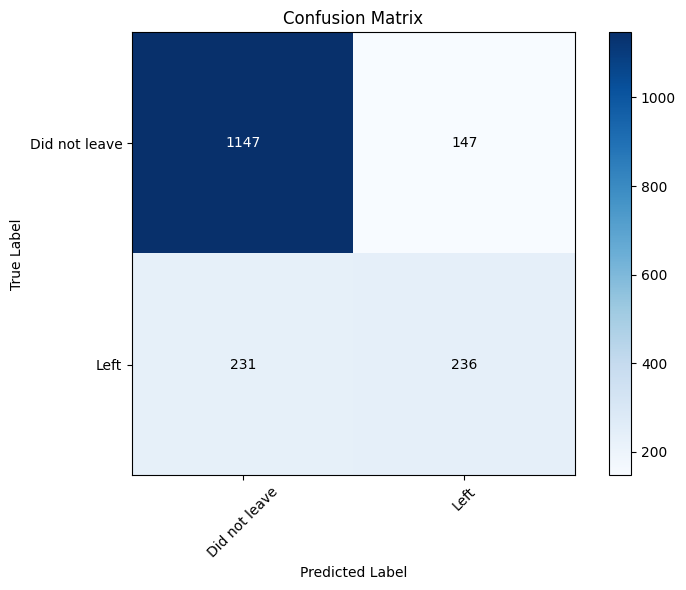

In [46]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Create an XGBoost classifier and fit it to your data (if you haven't already)

# Generate predictions on the test data
y_pred = clf_xgb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Did not leave", "Left"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate the cells with text and colored numbers
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

plt.show()


In [47]:
#round1
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma' : [0,1.0,10.0],
    'reg_lambda' :[10.0,20,100],
    'scale_pos_weight': [1,3,5]
}


In [48]:
#round2
param_grid={
    'max_depth': [4],
    'learning_rate':[0.1, 0.5, 1],
    'gamma' : [0.25],
    'reg_lambda' :[10.0,20,100],
    'scale_pos_weight': [3]
}

In [49]:
optimal_params=GridSearchCV(
    estimator=xgb.XGBClassifier( objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3
)

In [50]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=0.25,
                            learn_rate=0.1,
                            max_depth=4,
                            reg_lambda=10,
                            scale_pos_weight=3,
                            subsample=0.9,
                            colsample_bytree= 0.5)d
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

SyntaxError: invalid syntax (1472491100.py, line 10)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


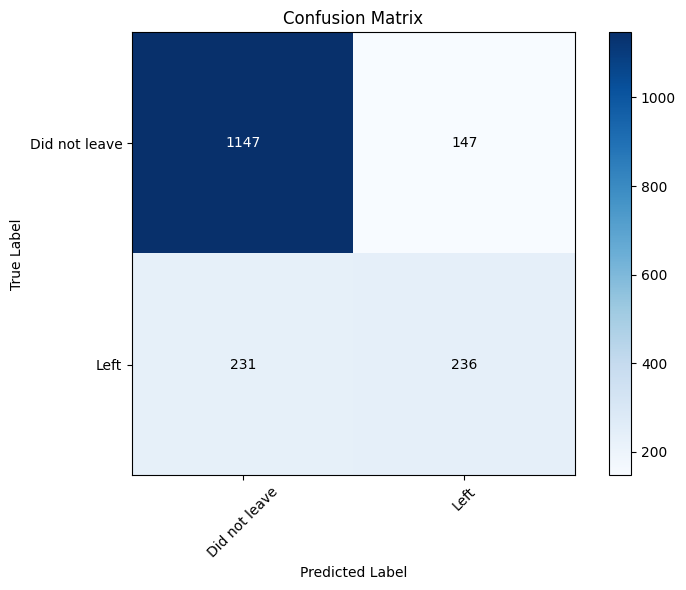

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Create an XGBoost classifier and fit it to your data (if you haven't already)

# Generate predictions on the test data
y_pred = clf_xgb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["Did not leave", "Left"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate the cells with text and colored numbers
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()

plt.show()


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Train your XGBoost model (you've already done this)
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)

c:\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c:\Python311\Lib\site-packages\xgboost\data.py:52

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

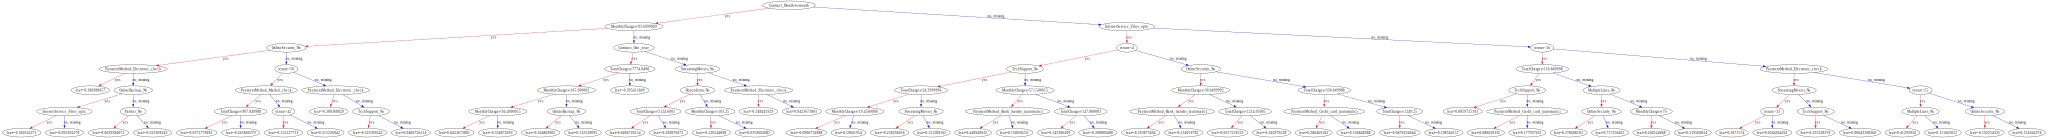

In [ ]:
import graphviz

xgb.to_graphviz(clf_xgb)

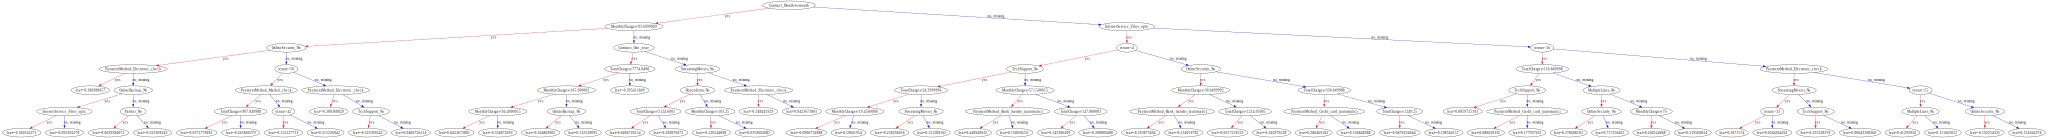

In [ ]:
import xgboost as xgb

# Assuming you have trained your XGBoost classifier and stored it in clf_xgb

# Define the attributes for the entire graph, including the figure size
graph_attr = {
    'size': '10,10',  # Set the figure size, e.g., 10 inches by 10 inches
    'rankdir': 'TB',  # Set the direction of the graph (e.g., 'TB' for top to bottom)
}

# Visualize the XGBoost model with specified attributes
xgb.to_graphviz(clf_xgb, num_trees=0, graph_attr=graph_attr)

# Render the graph
# graph.render("xgboost_classifier_tree_with_size")
